In [1]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("../data/fitness_gym.csv")

# Converter a coluna de data para formato datetime
df["date"] = pd.to_datetime(df["date"])

# Conferir a estrutura do DataFrame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   check_in_id          200 non-null    object        
 1   date                 200 non-null    datetime64[ns]
 2   time                 200 non-null    object        
 3   member_id            200 non-null    object        
 4   age                  200 non-null    int64         
 5   gender               200 non-null    object        
 6   membership_type      200 non-null    object        
 7   activity             200 non-null    object        
 8   duration_minutes     200 non-null    int64         
 9   calories_burned      200 non-null    int64         
 10  activity_category    200 non-null    object        
 11  attendance_streak    200 non-null    int64         
 12  satisfaction_score   200 non-null    int64         
 13  cancelled            200 non-null  

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
0,CHECK_0001,2023-01-01,07:16:00,MEMBER_0054,56,F,Basic,Yoga,50,162,Bem-estar,5,4,False,NaN
1,CHECK_0002,2023-01-02,18:47:00,MEMBER_0021,18,F,Premium,CrossFit,64,633,Funcional,22,5,False,NaN
2,CHECK_0003,2023-01-04,07:54:00,MEMBER_0072,36,M,Premium,Musculação,73,417,Força,16,5,False,NaN
3,CHECK_0004,2023-01-08,12:10:00,MEMBER_0016,19,F,Basic,Jump,41,360,Cardio,11,4,False,NaN
4,CHECK_0005,2023-01-12,08:14:00,MEMBER_0059,26,M,Basic,Musculação,81,462,Força,9,5,False,NaN


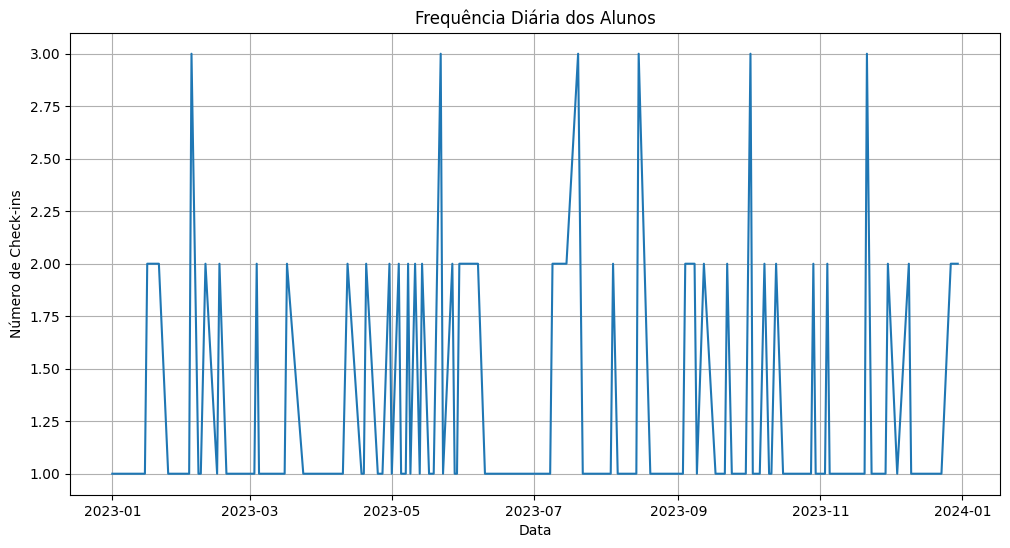

In [2]:
import matplotlib.pyplot as plt

# Agrupar por data e contar frequência
daily_checkins = df.groupby("date").size()

# Plotando gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(
  daily_checkins.index, daily_checkins.values
)
plt.title("Frequência Diária dos Alunos")
plt.xlabel("Data")
plt.ylabel("Número de Check-ins")
plt.grid(True)
plt.show()

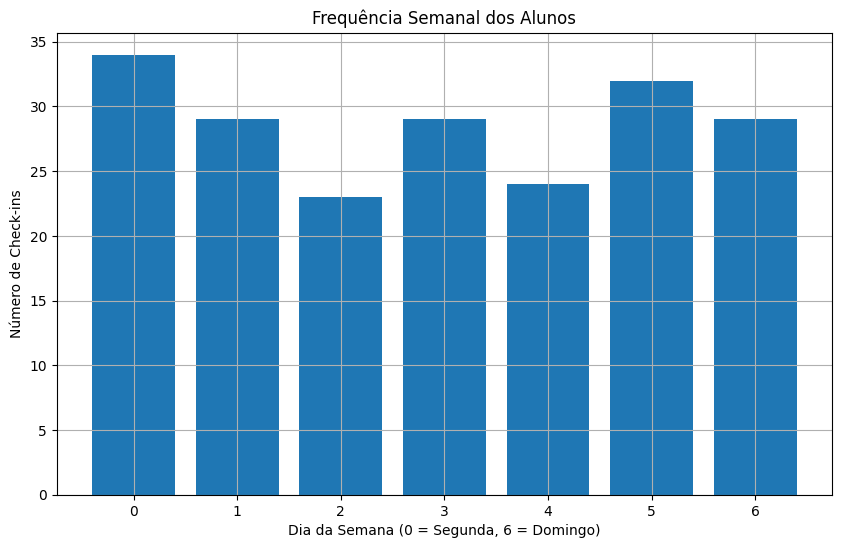

In [3]:
# Criando coluna com o dia da semana
df["day_of_week"] = df[
  "date"
].dt.dayofweek  # 0 é segunda-feira, 6 é domingo

# Agrupando por dia da semana
weekly_pattern = df.groupby("day_of_week").size()

# Plotando gráfico de barras para o padrão semanal
plt.figure(figsize=(10, 6))
plt.bar(
  weekly_pattern.index, weekly_pattern.values
)
plt.title("Frequência Semanal dos Alunos")
plt.xlabel(
  "Dia da Semana (0 = Segunda, 6 = Domingo)"
)
plt.ylabel("Número de Check-ins")
plt.grid(True)
plt.show()

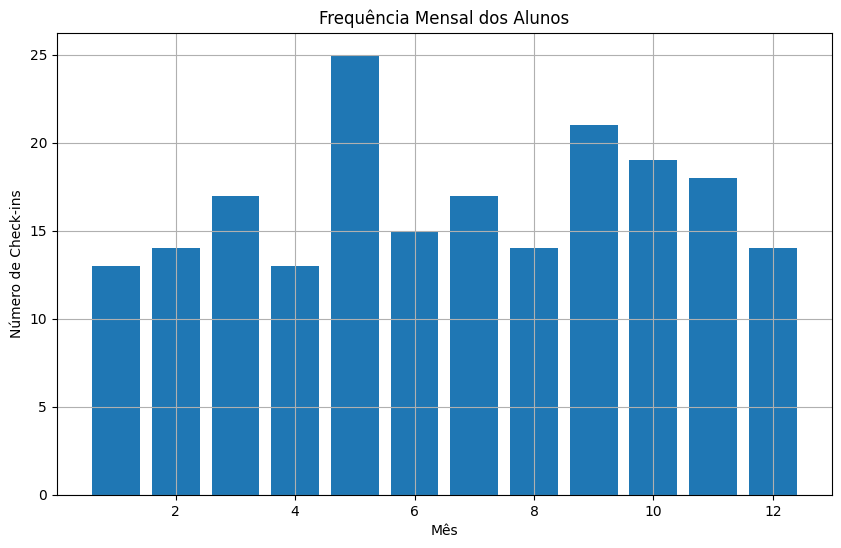

In [4]:
# Criando coluna com o mês
df["month"] = df["date"].dt.month

# Agrupando por mês
monthly_pattern = df.groupby("month").size()

# Plotando gráfico de barras para o padrão mensal
plt.figure(figsize=(10, 6))
plt.bar(
  monthly_pattern.index, monthly_pattern.values
)
plt.title("Frequência Mensal dos Alunos")
plt.xlabel("Mês")
plt.ylabel("Número de Check-ins")
plt.grid(True)
plt.show()

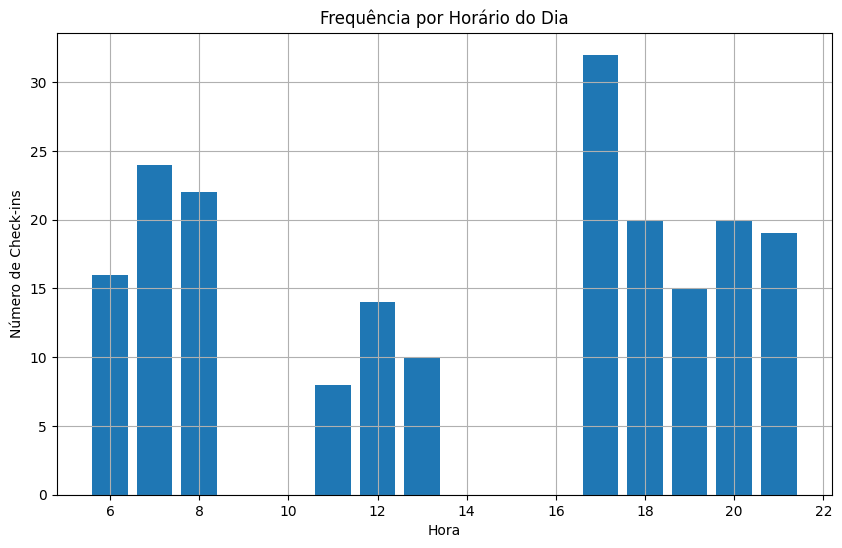

In [5]:
# Converter a coluna de time para formato datetime
df["time"] = pd.to_datetime(
  df["time"], format="%H:%M:%S"
).dt.hour

# Agrupar por horário
hourly_pattern = df.groupby("time").size()

# Plotando gráfico de barras para o padrão por horário
plt.figure(figsize=(10, 6))
plt.bar(
  hourly_pattern.index, hourly_pattern.values
)
plt.title("Frequência por Horário do Dia")
plt.xlabel("Hora")
plt.ylabel("Número de Check-ins")
plt.grid(True)
plt.show()

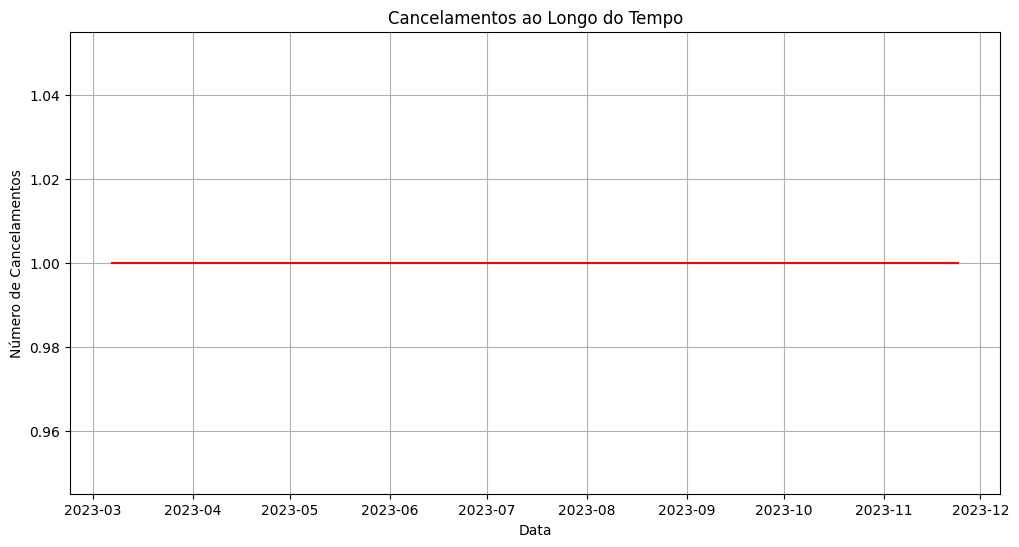

In [6]:
# Filtrar cancelamentos
cancel_df = df[df["cancelled"] == True]

# Agrupar cancelamentos por data
cancellations_by_date = cancel_df.groupby(
  "date"
).size()

# Gráfico de linha para cancelamentos
plt.figure(figsize=(12, 6))
plt.plot(
  cancellations_by_date.index,
  cancellations_by_date.values,
  color="red",
)
plt.title("Cancelamentos ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Número de Cancelamentos")
plt.grid(True)
plt.show()